In [1]:
#SOLUTION
!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [2]:
#SOLUTION

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [3]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Fuanction to create a population of individuals

In [4]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [5]:
#SOLUTION

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [6]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	657.927	1.04966
1  	213   	634.185	1.3604 
2  	243   	619.4  	1.3604 
3  	232   	604.601	1.38176
4  	233   	597.993	4.43606
5  	218   	592.858	2.17821
6  	213   	582.762	1.51456
7  	233   	578.288	0.137691
8  	219   	566.746	0.137691
9  	209   	547.166	0.137691
10 	224   	532.129	3.96697 
11 	230   	528.565	0.506408
12 	230   	506.028	2.75406 
13 	217   	467.911	1.58977 
14 	231   	430.479	1.12092 
15 	250   	404.279	2.55464 
16 	238   	388.082	2.55464 
17 	236   	382.829	2.55464 
18 	225   	376.087	2.55464 
19 	225   	367.291	4.95605 
20 	209   	360.316	5.35148 
21 	232   	356.528	5.56167 
22 	237   	349.513	7.42803 
23 	217   	346.074	6.52911 
24 	227   	339.396	6.50091 
25 	246   	333.156	2.57799 
26 	233   	319.56 	6.68514 
27 	219   	312.453	6.7382  
28 	229   	305.75 	2.20972 
29 	223   	302.126	9.7518  
30 	238   	301.969	7.70202 
31 	225   	299.059	10.4591 
32 	221   	306.298	9.36822 
33 	243   	297.505	8.89126 
34 	232   	297.952	6.82471 


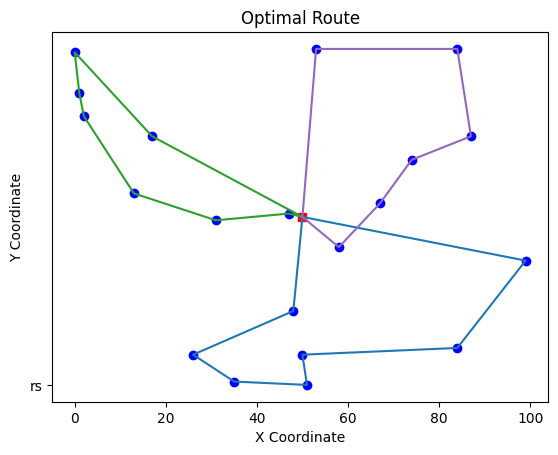

In [7]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    main()